### Vader 감성 분석 라이브러리 활용

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [2]:
sentiment_analyzer_scores('I am happy.')

{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

In [3]:
sentiment_analyzer_scores('I am very happy.')

{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6115}

In [4]:
sentiment_analyzer_scores('I am not happy.')

{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.4585}

### 리뷰 감성 측정

In [5]:
import pandas as pd

mobile = pd.read_csv('data/mobile2014.csv')

In [6]:
mobile.iloc[0,4]

'Phone does not work. Does not allow outgoing text . Incoming calls. Would not disable South African settings. Waste of money'

In [7]:
sentiment_analyzer_scores(mobile.iloc[0,4])

{'neg': 0.261, 'neu': 0.739, 'pos': 0.0, 'compound': -0.6546}

- 감성 스코어 컬럼 생성

In [8]:
sent = []

for i in range(len(mobile)):
    if(pd.isna(mobile.iloc[i,4]) == True):
        sent.append(0)
    else:
        sent.append(sentiment_analyzer_scores(mobile.iloc[i,4])['compound'])
    
mobile['sentiment_score'] = sent
mobile.head()

,ID,Title,Author,ReviewID,Texts,YMD,Sentiment,sentiment_score
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0,-0.6546
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0,-0.3467
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0,-0.7003
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0,0.7351
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0,-0.2263


### 감성 사전 활용

In [9]:
import nltk
import pandas as pd

mobile = pd.read_csv('data/mobile2014.csv')
mobile.head()

nltk.download('opinion_lexicon')

from nltk.corpus import opinion_lexicon

pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

pos_list

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\JT\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


{'sensibly',
 'stately',
 'low-priced',
 'inventive',
 'energy-efficient',
 'wonderfully',
 'faithfulness',
 'respect',
 'protection',
 'bloom',
 'dominated',
 'salute',
 'adorable',
 'divinely',
 'ebulliently',
 'titillate',
 'dumbfounded',
 'self-satisfaction',
 'slammin',
 'delightful',
 'suavely',
 'recommendation',
 'exalting',
 'sparkle',
 'wowed',
 'fondly',
 'blockbuster',
 'beauteous',
 'truthfulness',
 'loves',
 'admirable',
 'hail',
 'breakthrough',
 'insightful',
 'invigorating',
 'celebrated',
 'originality',
 'togetherness',
 'congratulate',
 'spiritual',
 'holy',
 'jubilant',
 'zippy',
 'politeness',
 'warmly',
 'pepped',
 'examplar',
 'coolest',
 'equitable',
 'harmless',
 'endorsing',
 'tranquil',
 'succeeding',
 'benefits',
 'charismatic',
 'redemption',
 'steadiest',
 'dreamland',
 'astounding',
 'righteous',
 'conciliate',
 'tough',
 'gladden',
 'pampers',
 'calm',
 'integral',
 'ovation',
 'good',
 'ardent',
 'dashing',
 'handy',
 'razor-sharp',
 'trophy',
 'simpli

In [10]:
neg_list

{'deviousness',
 'comical',
 'skeptic',
 'lazy',
 'glower',
 '2-faces',
 'rejecting',
 'bunk',
 'imperfect',
 'resentment',
 'lacked',
 'stumbled',
 'collusion',
 'unexpectedly',
 'usurper',
 'rumbling',
 'tyranny',
 'meaningless',
 'limp',
 'cruelest',
 'bribery',
 'bungler',
 'heretic',
 'layoff',
 'worst',
 'superstition',
 'checkered',
 'damages',
 'disillusioned',
 'flaky',
 'lacks',
 'revoke',
 'barbarian',
 'anxious',
 'embroilment',
 'ingratitude',
 'angrily',
 'wasted',
 'dungeons',
 'deceit',
 'bonkers',
 'discontinued',
 'pernicious',
 'scowl',
 'unsettle',
 'creeps',
 'emasculate',
 'expensive',
 'rivalry',
 'slaughtered',
 'full-blown',
 'detested',
 'suicidal',
 'unjustly',
 'flareups',
 'unreachable',
 'desolation',
 'sober',
 'uprising',
 'calumniously',
 'loath',
 'zealously',
 'jaundiced',
 'desperate',
 'contradictory',
 'strictly',
 'torture',
 'sob',
 'wimpy',
 'wrip',
 'taint',
 'enfeeble',
 'unneeded',
 'scars',
 'unlamentably',
 'omit',
 'patronize',
 'deformed'

In [11]:
from nltk.tokenize import treebank

tokenizer = treebank.TreebankWordTokenizer()

def sentiment(sentence):
  senti=0
  words = [word.lower() for word in tokenizer.tokenize(sentence)]
  for word in words:
    if word in pos_list:
      senti += 1
    elif word in neg_list:
      senti -= 1
  return senti

from tqdm import *

mobile['sentiment_dict'] = 0
x = len(mobile)

for i in tqdm(range(0,x)):
    if(pd.isnull(mobile.iloc[i,4])) :
        mobile.iloc[i,7] = 0
    else :
        mobile.iloc[i,7] =  sentiment(mobile.iloc[i,4])

mobile.head()

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1543.17it/s]


,ID,Title,Author,ReviewID,Texts,YMD,Sentiment,sentiment_dict
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0,-2
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0,2
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0,-1
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0,0
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0,-1


- 한글 감성 사전 활용 감성 분석

In [12]:
import json

class KnuSL():

	def data_list(wordname):	
		with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
		result = ['None','None']	
		for i in range(0, len(data)):
			if data[i]['word'] == wordname:
				result.pop()
				result.pop()
				result.append(data[i]['word_root'])
				result.append(data[i]['polarity'])	
		
		r_word = result[0]
		s_word = result[1]
							
		print('어근 : ' + r_word)
		print('극성 : ' + s_word)		
		
		
		return r_word, s_word

if __name__ == "__main__":
	
	ksl = KnuSL
	
	print("\nKNU 한국어 감성사전입니다~ :)")
	print("사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!")
	print("종료하시려면 #을 입력해주세요!!!")
	print("-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정")
	print("\n")	

	while(True):
		wordname = input("word : ")
		wordname = wordname.strip(" ")		
		if wordname != "#":
			print(ksl.data_list(wordname))
			print("\n")	
				

		elif wordname == "#":
			print("\n이용해주셔서 감사합니다~ :)")
			break


KNU 한국어 감성사전입니다~ :)
사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!
종료하시려면 #을 입력해주세요!!!
-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정


word : 행복합니다
어근 : None
극성 : None
('None', 'None')


word : 행복
어근 : 행복
극성 : 2
('행복', '2')


word : 짜증
어근 : 짜증
극성 : -2
('짜증', '-2')


word : #

이용해주셔서 감사합니다~ :)


In [13]:
import json
import pandas as pd
import konlpy

endgame = pd.read_csv('data/endgame.csv')
endgame.head()

from konlpy.tag import *

okt = Okt()

endgame['sentiment'] = 0

def sent_list(wordname):
    with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
        data = json.load(f)
        result = ['None','None']
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])

        s_word = result[1]

        return s_word

from tqdm import *
review_length = len(endgame)

for j in tqdm(range(0, review_length)):
    words = okt.pos(endgame.iloc[j,1])
    x = len(words)
    sent_sum = 0

    for i in range(0,x):
        sent = sent_list(words[i][0])
        if( sent != 'None'):
            sent_sum += int(sent)
    
    endgame.iloc[j,2] = sent_sum

endgame.head()


100%|██████████████████████████████████████████████████████████████████████████████| 4602/4602 [25:37<00:00,  2.99it/s]


,Rating,Text,sentiment
0,0,\n ...,0
1,1,\n ...,-3
2,8,\n ...,0
3,6,\n ...,0
4,10,\n ...,1


### 감성 사전 만들기

In [14]:
import nltk
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifier

mobile = pd.read_csv('data/mobile2014.csv')
mobile.head()
mobile = mobile.dropna()

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english'
                     ,ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(mobile['Texts'])
    
X = text_counts
y = mobile.iloc[:,6]

In [15]:
ridge_reg = RidgeClassifier(alpha = 1, solver="sag")
ridge_reg.fit(X,y)

ridge_reg.coef_

C:\venvs\datam\lib\site-packages\sklearn\linear_model\_ridge.py:556: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


array([[-0.11942414, -0.06083008,  0.00185333, ..., -0.0102447 ,
         0.00760206, -0.00245472]])

In [16]:
pred = ridge_reg.predict(X)

from sklearn.metrics import precision_score, recall_score, f1_score

#precision_score(y,pred)
#recall_score(y,pred)
f1_score(y,pred)

0.9835575485799701

In [17]:
text_counts
a = pd.DataFrame(text_counts.todense())
a 

,0,1,2,3,4,5,6,7,8,9,...,7613,7614,7615,7616,7617,7618,7619,7620,7621,7622
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
import sklearn.feature_extraction

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
ngram_size = 1

vectorizer = sklearn.feature_extraction.text.CountVectorizer(
	lowercase=True,stop_words='english',ngram_range = (1,1),
	tokenizer = token.tokenize)

vect = vectorizer.fit(mobile['Texts'])
print('vect.get_feature_names(): {0}'.format(vect.get_feature_names()))

len(vect.get_feature_names()) # 7623

vect.get_feature_names(): ['0', '00', '000', '0000000', '00pm', '01', '01usd', '02', '03', '06', '08', '0gb', '1', '10', '100', '1000', '100min', '100s', '102', '1020', '1080', '1080p', '10bmp', '10conclussions', '10gb', '10mbps', '10positives', '10th', '11', '112gm', '113', '1136', '115', '11oz', '11pm', '11th', '12', '120', '1200', '122', '128', '1280', '1280x720', '1280x800', '128gb', '129', '12th', '12yr', '13', '130', '139', '13mb', '14', '140', '142cm', '143', '145', '145g', '149', '14th', '15', '150', '152', '1520', '16', '160', '1600', '1600x900', '168', '16gb', '16gbmy', '16hrs', '16mp', '16th', '17', '178', '179', '17bday', '18', '180', '1800', '189', '18th', '19', '1900', '190mb', '1920', '1920x1080', '199', '1999', '19th', '1a', '1at', '1cm', '1gb', '1hour', '1in', '1mm', '1st', '1yr', '2', '20', '200', '2000', '2001', '2007', '2008', '200k', '2010', '20101014901', '2011', '2012', '20120510035744301', '2013', '2014', '2014i', '2015', '2070', '209gm', '20ea', '20mb', '20mp',

C:\venvs\datam\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


7623

In [19]:
vect.get_feature_names()[np.argmax(ridge_reg.coef_)] 

'thank'

In [20]:
vect.get_feature_names()[np.argmin(ridge_reg.coef_)] 

'horrible'

### 토픽 모델링

In [1]:
#pip install pyLDAvis

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

df = pd.read_csv('data/mobile2014.csv')
df.head()

,ID,Title,Author,ReviewID,Texts,YMD,Sentiment
0,127335,Ripoff don't buy it. Would like to know how to...,Alex Cropper,R112X6CB1GTVF7,Phone does not work. Does not allow outgoing t...,2014-01-14,0
1,161579,I am not satisfied with the product,Monica Heredia,R3MQ3FY4PWPQFM,"I am not satisfied with the iPhone 5s, because...",2014-01-07,0
2,152064,Stay away buy something else,Mark Ducette monte carlo,R1QVAAZ9DWLN5Q,"EATS BATTERIES, BRAND NEW BATTERIES IT EATS FA...",2014-01-28,0
3,180094,wondering,eaamber,R3AR8LYIC3BOI9,I'm wondering if this phone is good or bad I j...,2014-01-15,0
4,180037,virus,pamela,RCYC822DI3R6K,When i got the phone it had a virus on it with...,2014-01-10,0


In [2]:
# 리스트로 변환
data = df.Texts.values.tolist()

pprint(data[:1])

['Phone does not work. Does not allow outgoing text . Incoming calls. Would '
 'not disable South African settings. Waste of money']


In [3]:
# 영어 리뷰에서 단어로 분할해 주는 함수

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
data_words = list(sent_to_words(data)) 
print(data_words[:1])

[['phone', 'does', 'not', 'work', 'does', 'not', 'allow', 'outgoing', 'text', 'incoming', 'calls', 'would', 'not', 'disable', 'south', 'african', 'settings', 'waste', 'of', 'money']]


In [4]:
## 표제어 추출 함수 (명사, 형용사, 동사, 부사)

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [5]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
# For windows: pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz --no-deps

In [7]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:2])

['phone work allow outgoing text incoming call would disable south african setting waste money', 'satisfied iphone buy unlocked iphone one recieve unlocked more could tell how will solve problem despiste decision want tell completely satisfied product']


In [8]:
# 빈도 기반 단어 문서 매트릭스 생성

vectorizer = CountVectorizer(
    analyzer='word',
    min_df=10, #  최소 등장 회수 10회 이상 단어
    stop_words='english', # 영어 불용어 제거
    lowercase=True, # 소문자로 변경                                                
    token_pattern='[a-zA-Z0-9]{2,}'
)

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [9]:
# 토픽 10개 LDA 실행

NUM_TOPICS = 10
lda_model = LatentDirichletAllocation(
    n_components=NUM_TOPICS,
    max_iter=10,
    learning_method='online',
    random_state=100,
    batch_size=128,
    evaluate_every = -1,
    n_jobs = -1,               
)

lda_output = lda_model.fit_transform(data_vectorized)

In [10]:
log = lda_model.score(data_vectorized)
print(log)

-287209.86271066964


In [11]:
per = lda_model.perplexity(data_vectorized)
print(per)

414.30561981939866


In [12]:
# 문서별 대표 토픽 및 토픽에 속할 확률

# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.300000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.610000,9
Doc1,0.010000,0.010000,0.280000,0.010000,0.010000,0.010000,0.290000,0.010000,0.390000,0.010000,8
Doc2,0.010000,0.440000,0.330000,0.170000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1
Doc3,0.010000,0.080000,0.010000,0.010000,0.870000,0.010000,0.010000,0.010000,0.010000,0.010000,4
Doc4,0.020000,0.020000,0.020000,0.020000,0.850000,0.020000,0.020000,0.020000,0.020000,0.020000,4
Doc5,0.010000,0.010000,0.390000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.570000,9
Doc6,0.010000,0.010000,0.010000,0.940000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,3
Doc7,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.910000,9
Doc8,0.000000,0.000000,0.160000,0.000000,0.640000,0.000000,0.090000,0.100000,0.000000,0.000000,4
Doc9,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,0.000000,2


In [13]:
# 토픽에 속한 단어 

def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15) 
topic_keywords

[array(['money', 'waste', 'work', 'cellphone', 'signal', 'day', 'don',
        'complain', 'time', 'receive', 'return', 'equipment', 'sell',
        'spend', 'crash'], dtype='<U13'),
 array(['new', 'apple', 'easy', 'smartphone', 'device', 'line', 'store',
        'iphone', 'tell', 'upgrade', 'right', 'brand', 'use', 'number',
        'buy'], dtype='<U13'),
 array(['phone', 'good', 'new', 'recommend', 'buy', 'purchase', 'great',
        'use', 'say', 'problem', 'price', 'come', 'need', 'receive',
        'product'], dtype='<U13'),
 array(['phone', 'screen', 'use', 'small', 'little', 'good', 'look',
        'make', 'big', 'able', 'note', 'button', 'year', 'change', 'want'],
       dtype='<U13'),
 array(['phone', 'just', 'battery', 'charge', 'work', 'buy', 'bad', 'day',
        'use', 'make', 'good', 'screen', 'turn', 'hour', 'month'],
       dtype='<U13'),
 array(['excellent', 'battery', 'product', 'phone', 'gift', 'work', 'buy',
        'ship', 'quality', 'send', 'want', 'charger', 'fre

In [14]:
# 토픽 모델링 결과 시각화

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.012595  0.015998       1        1  24.714251
2     -0.082658 -0.002093       2        1  17.641158
8     -0.178243  0.154624       3        1  15.631895
9     -0.051039 -0.069321       4        1  12.675035
7     -0.068674  0.055051       5        1   7.932449
3     -0.137864  0.097752       6        1   7.185508
6      0.017575 -0.252263       7        1   5.186182
1      0.028039 -0.202086       8        1   3.906263
5      0.136424  0.090377       9        1   3.063423
0      0.349034  0.111961      10        1   2.063837, topic_info=        Term         Freq        Total Category  logprob  loglift
438    money   263.000000   263.000000  Default  30.0000  30.0000
500    phone  4007.000000  4007.000000  Default  29.0000  29.0000
805     work   745.000000   745.000000  Default  28.0000  28.0000
293    great   572.000000   572.000000  Default  27.0000  27.0000
400     love   397.000000   397.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
748      try    11.492243   213.928249  Topic10  -4.4495   0.9566
711     talk     6.193003   118.594891  Topic10  -5.0678   0.9283
539  problem     8.848524   247.676313  Topic10  -4.7109   0.5487
50   battery     8.882587   448.228063  Topic10  -4.7071  -0.0406
463   number     2.303564    82.993128  Topic10  -6.0567   0.2963

[558 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         6  0.949092  ability
1         4  0.039514     able
1         6  0.533442     able
1         7  0.345749     able
1         9  0.069150     able
...     ...       ...      ...
812       4  0.361995     year
812       5  0.025403     year
812       6  0.317539     year
813       4  0.314831  youtube
813       7  0.692627  youtube

[1107 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 9, 10, 8, 4, 7, 2, 6, 1])

In [15]:
# 최적 토픽 수 찾기 - Perplexity 

log_list = []
per_list = []
k_list = []
for i in range(2,21):
    NUM_TOPICS = i
    lda_model = LatentDirichletAllocation(
                        n_components=NUM_TOPICS,               
                        max_iter=10,               
                        learning_method='online',   
                        random_state=100,          
                        batch_size=128,            
                        evaluate_every = -1,       
                        n_jobs = -1,               
                    )
    lda_output = lda_model.fit_transform(data_vectorized)
    log = lda_model.score(data_vectorized)
    per = lda_model.perplexity(data_vectorized)
    log_list.append(log)
    per_list.append(per)
    k_list.append(NUM_TOPICS)
    print(NUM_TOPICS)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


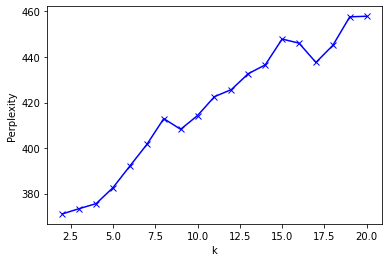

In [16]:
df = pd.DataFrame({'k': k_list, 'log': log_list, 'perplexity': per_list})

plt.plot(df.k, df.perplexity, 'bx-')
plt.xlabel('k')
plt.ylabel('Perplexity')
plt.show()

- 토픽 수가 작을 수록 perplexity 지표 값이 낮으므로 작은 수를 토픽 수로 선정하여야 한다. 
- 2부터 6까지는 perplexity 값이 큰 차이가 있지는 않으므로 각각의 경우에 따라 토픽을 구해보고 적합한 토픽 수를 파악해야 한다. 

### 연습문제 (1)

- 속성기반 감성 점수 분석 방안은 “구매후기 한 줄에 고객의 이런 속마음이” 마케팅 난제, 속 시원히 풀어주는 분석 (동아비즈니스리뷰, 2018년 11월 Issue 2) ^[https://dbr.donga.com/article/view/1202/article_no/8891]^를 참조하면 많은 인사이트를 얻을 수 있다. 

- 분석을 위해서 화장품 리뷰 사이트인 글로우픽에서 이니스프리의 ‘스킨 클리닉 마스크 - 마데카소사이드’ (https://www.glowpick.com/product/41100)에 대한 리뷰 100개를 수집하였다. 
- 글로우픽은 제품에 대한 평가를 긍정적인 것 부터 부정적인 것 까지 짱짱!, 굿굿!, 쏘쏘!, 별로!, 최악! 으로 분류하고 있는데, 각각 20개씩의 리뷰를 수집하였다.

- 해당 제품의 속성 간단하게 보습, 제형, 트러블로 구분했고 각 속성에 해당하는 단어는 임의로 다음과 같이 설정하였다. 속성의 구분과 속성에 해당하는 단어의 선정은 해당 분야의 전문가가 등장하는 단어들을 가지고 설정하면 된다. 

- 보습(humid): 보습, 촉촉, 진정, 수분
- 제형(material): 제형, 팩, 크림, 액체
- 트러블(trouble): 여드름, 뾰루지, 좁쌀, 트러블

- 수집한 리뷰 beauty.csv를 불러들여서 한 리뷰를 문장으로 나누고, 문장을 형태소로 구분한다. 각 형태소가 속성 단어에 매칭되는 수를 가지고, 해당 리뷰는 가장 많이 매칭되는 속성에 분류한다. 그 후에 문장에 대한 감성 점수를 계산하고 속성에 분류된 리뷰들의 감성 점수 평균을 구하는 방안이다. 

In [17]:
import numpy as np
import pandas as pd
import json
from tqdm import *

# url = 'https://www.glowpick.com/product/41100'
beauty = pd.read_csv('data/beauty.csv')
beauty.head()

,review,rating
0,이거 진짜 좋아여!! 피부에 뭐 안좋은거가 생기면 진짜 기달리기 바쁜데 이건 한번 ...,5
1,이번에 여드름이랑 뾰루지가 폭팔해서 너무스트레스였습니다..ㅠㅠ평소잘쓰던 스킨케어가 ...,5
2,"사용감은 얘가 최고에요. 끈적이지 않고, 진정과 수분공급도 가능한데 가격까지 상대적...",5
3,"수부지, 지성, 트러블, 홍조, 속당김은 무조건 얘에요 얘! 환절기에 가을로접어들면...",5
4,마이원앤온리마스크팩..! 흑흑 정말 너무 좋습니다 티트리가 잘 안맞는 피부라 트러블...,5


In [18]:
from konlpy.tag import *

okt = Okt()

humid = ['보습','촉촉','진정','수분']
material = ['제형','팩','크림','액체']
trouble = ['여드름','뾰루지','좁쌀','트러블']

def sent_list(wordname):
    with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
        data = json.load(f)
        result = ['None','None']
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])

        s_word = result[1]

        return s_word

# 문장 구분 
from nltk.tokenize.punkt import PunktSentenceTokenizer

sentence_splitter = PunktSentenceTokenizer()
sentences = sentence_splitter.tokenize(beauty.iloc[0,0])
sentences

['이거 진짜 좋아여!!',
 '피부에 뭐 안좋은거가 생기면 진짜 기달리기 바쁜데 이건 한번 사용하면 바로 없어지니깐 진짜 좋아요!!!',
 '친구가 추천해줘서 사용해봤는데 진짜 좋은게 맞는것같아요!!!',
 '진짜 모두 사용해보세여!',
 '!']

In [19]:
# 형태소 분석
for sentence in sentences :
    print(okt.morphs(sentence))

## 속성 감성 스코어 계산

hu = []
ma = []
tr = []
var_names = ['h', 'm', 't']

for i in tqdm(range(len(beauty))):
    sentences = sentence_splitter.tokenize(beauty.iloc[i,0])

    for sentence in sentences :
        h = 0
        m = 0
        t = 0
        words = okt.morphs(sentence)
    
        for word in words:
            if(word in humid):
                h += 1
        
            if(word in material):
                m += 1
            
            if(word in trouble):
                t += 1
        
        words = okt.pos(sentence)
        x = len(words)
        sent_sum = 0

        for i in range(0,x):
            sent = sent_list(words[i][0])
            if( sent != 'None'):
                sent_sum += int(sent)
        
        #lambda is a small anonymous function
        # zip var_names, values and then max 
        max_var = max(zip(var_names, (map(eval, var_names))), key=lambda tuple: tuple[1])[0]
        
        # tied is not considered to make it simple
        if (max_var == 'h'):
            if( h > 0):
                hu.append(sent_sum)
        elif (max_var == 'm'):
            if( m > 0):
                ma.append(sent_sum)
        elif (max_var == 't'):
            if( t > 0):
                tr.append(sent_sum)

print(np.mean(hu)) 
print(np.mean(ma)) 
print(np.mean(tr)) 

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

['이', '거', '진짜', '좋아여', '!!']
['피부', '에', '뭐', '안좋은', '거가', '생기', '면', '진짜', '기', '달리기', '바쁜데', '이건', '한번', '사용', '하면', '바로', '없어지니깐', '진짜', '좋아요', '!!!']
['친구', '가', '추천', '해줘서', '사용', '해봤는데', '진짜', '좋', '은', '게', '맞는것', '같아요', '!!!']
['진짜', '모두', '사용', '해보세여', '!']
['!']


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:27<00:00,  1.14it/s]

0.5454545454545454
0.13636363636363635
0.25


- 문장을 기준으로 보습 humid, 제형 material, 트러블 trouble에 속한 단어의 수를 세고 세 분야중에서 가장 많은 단어가 포함된 속성으로 문장을 분류한다. 
해당 문장의 감성점수를 계산하여 각 속성의 감성값에 넣어주며, 모든 리뷰에 대한 계산이 종료된 후에 각 속성별 평균 감성 점수 값을 구하였다. 

### 연습문제 (2)

In [20]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

df = pd.read_csv('data/endgame.csv')
df.head()

,Rating,Text
0,0,\n ...
1,1,\n ...
2,8,\n ...
3,6,\n ...
4,10,\n ...


In [21]:
# Convert to list
data = df.Text.values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

[' Too much ']


<>:5: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \s
<ipython-input-21-4d44c71e79a9>:5: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [22]:
# 엔드게임 리뷰에서 명사만 추출 

from konlpy.tag import *
from nltk import Text

okt = Okt()

data_morph = []
for i in range(len(data)):
    data_morph.append(" ".join(okt.nouns(data[i])))

data_morph

['',
 '만화 연출 노잼',
 '마침내 마블 시간 동안 준비 지상 최대 쇼',
 '',
 '정말 마블 캐릭터 싶었닼 와중 엑스맨 안 화남 예상 엑스맨 팬 어벤저스 팬 차이 커서 전작 가오 다른 세계관 영화 연관 더',
 '어벤져스 어셈블 때 표정 무표정 마음 예 스파이디 땐 펑펑 울 로다주 사인 때 멋젔어 유튜브 볼땐 팬 난리',
 '',
 '진짜 영화관 못 보신 작용 사서 정도 가치 영화',
 '',
 '어벤져스',
 '',
 '만화 연출 노잼',
 '마침내 마블 시간 동안 준비 지상 최대 쇼',
 '',
 '정말 마블 캐릭터 싶었닼 와중 엑스맨 안 화남 예상 엑스맨 팬 어벤저스 팬 차이 커서 전작 가오 다른 세계관 영화 연관 더',
 '어벤져스 어셈블 때 표정 무표정 마음 예 스파이디 땐 펑펑 울 로다주 사인 때 멋젔어 유튜브 볼땐 팬 난리',
 '',
 '진짜 영화관 못 보신 작용 사서 정도 가치 영화',
 '',
 '어벤져스',
 '어벤져스 어셈블',
 '개꿀잼',
 '',
 '',
 '걸 끝 일주일 끝장 집결 신 아주 살짝 볼 서론 용이 배우 것 것 상한 느낌 뭔가 잔뜩 역시 박진 감 짜증 오씨 재방 볼일 시간 낭비 여운 즐거움 그냥 걸끝 줌마 렵 다음 평이 인간 네이버 평점 조작 의심 양심 분 집결',
 '스토리 어디 액션 히어로 물 액션씬 장르 차라리 드라마 뻔 스토리 몰입 크게 다만',
 '',
 '끝 게',
 '지금껏 마블 시리즈 정리 집대성 종반 부 히어로 집결 형세 러닝 타임 체감 연결고리 힘 때문',
 '중반',
 '마무리 답 진짜 마지막 격돌 씬 웅장 긴장감 아이언맨 캡틴 더 이상 진짜 줄 슈퍼히어로 영화 중 어벤저스 영화 다시 수가 아마 생각 듬',
 '정말',
 '면도 여운',
 '',
 '최고 히어로 영화 오락 영화 점 정도 만점 유독 저 평가 블록버스터 영화 평점 오락 것 보기 때문 아닐런',
 '최초 지루함 하품 나머지 아주 아이언맨 죽음',
 '스토리 완성 도 쫌 나노 뭐시기 타임 리프 설정 뭐 어벤져스',
 '극장 뿐',

In [23]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=5                         
                             # max_features=50000,             
                            )

data_vectorized = vectorizer.fit_transform(data_morph)


NUM_TOPICS = 5
lda_model = LatentDirichletAllocation(
                        n_components=NUM_TOPICS,              
                        max_iter=10,               
                        learning_method='online',   
                        random_state=100,          
                        batch_size=128,            
                        evaluate_every = -1,       
                        #n_jobs = -1,               
                    )
lda_output = lda_model.fit_transform(data_vectorized)
log = lda_model.score(data_vectorized)
per = lda_model.perplexity(data_vectorized)
print(NUM_TOPICS)

5


In [24]:
print(log)
print(per)

-100766.70027037186
349.97017633359224


In [25]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.200000,0.200000,0.200000,0.200000,0.200000,0
Doc1,0.800000,0.050000,0.050000,0.050000,0.050000,0
Doc2,0.040000,0.040000,0.040000,0.160000,0.720000,4
Doc3,0.200000,0.200000,0.200000,0.200000,0.200000,0
Doc4,0.690000,0.270000,0.010000,0.010000,0.010000,0
Doc5,0.030000,0.030000,0.890000,0.030000,0.030000,2
Doc6,0.200000,0.200000,0.200000,0.200000,0.200000,0
Doc7,0.610000,0.150000,0.190000,0.030000,0.030000,0
Doc8,0.200000,0.200000,0.200000,0.200000,0.200000,0
Doc9,0.100000,0.100000,0.600000,0.100000,0.100000,2


In [26]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15) 
topic_keywords

[array(['영화', '마블', '그냥', '사람', '인피니티', '보고', '평점', '재미', '시리즈', '정도',
        '처음', '지루함', '부분', '스토리', '느낌'], dtype='<U6'),
 array(['마지막', '진짜', '기대', '최고', '생각', '액션', '스포', '전편', '이상', '전투씬', '조금',
        '초반', '이건', '후반', '어벤저스'], dtype='<U6'),
 array(['영화', '어벤져스', '마블', '마무리', '감동', '히어로', '시리즈', '정말', '최고', '마지막',
        '장면', '사람', '스토리', '눈물', '액션'], dtype='<U6'),
 array(['시간', '중간', '역시', '이제', '토니', '아이언맨', '지루', '가장', '결말', '지난',
        '굿바이', '한번', '게임', '이영화', '모든'], dtype='<U6'),
 array(['아이언맨', '노스', '마블', '사랑', '내용', '영웅', '캡틴', '캡틴마블', '완전', '선물',
        '시작', '정리', '역대', '스톤', '안녕'], dtype='<U6')]

In [27]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.215573 -0.071114       1        1  27.640588
0     -0.163746 -0.175929       2        1  27.335299
1     -0.107553  0.331564       3        1  17.045897
4      0.172165 -0.127135       4        1  16.501138
3      0.314706  0.042615       5        1  11.477079, topic_info=     Term         Freq        Total Category  logprob  loglift
380    영화  1220.000000  1220.000000  Default  30.0000  30.0000
347  어벤져스   325.000000   325.000000  Default  29.0000  29.0000
325  아이언맨   286.000000   286.000000  Default  28.0000  28.0000
297    시간   209.000000   209.000000  Default  27.0000  27.0000
530    진짜   165.000000   165.000000  Default  26.0000  26.0000
..    ...          ...          ...      ...      ...      ...
44     고생    21.645742    30.605442   Topic5  -4.5132   1.8184
574    타샤    23.512312    37.885909   Topic5  -4.4304   1.6878
325  아이언맨    52.626668   286.250223   Topic5  -3.6247   0.4712
185    모든    25.060335    72.661641   Topic5  -4.3667   1.1003
564    캡틴    22.146577    95.647540   Topic5  -4.4903   0.7018

[251 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.955121   가망
7         1  0.021751   가장
7         5  0.957065   가장
8         3  0.966267   가족
16        1  0.712127   감동
...     ...       ...  ...
641       1  0.085129   희생
641       3  0.893850   희생
642       1  0.713552  히어로
642       3  0.095140  히어로
642       4  0.190281  히어로

[278 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 5, 4])